<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Daily_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
# Lire le fichier depuis Google Drive (ajustez le chemin selon votre structure Drive)
data = pd.read_csv('/content/drive/MyDrive/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

# Afficher les premières lignes pour vérifier les données
print("Aperçu des données :")
print(data.head())

# Informations sur le dataset
print("\nInformations sur le dataset :")
print(data.info())


Aperçu des données :
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    100 non-null    float64
 1   Exam 2    100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


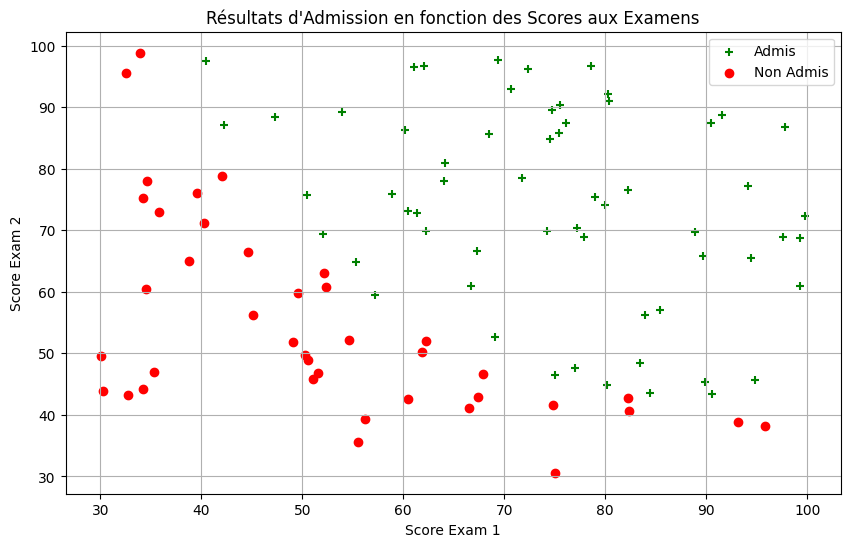

In [4]:
# Créer un scatter plot
plt.figure(figsize=(10, 6))
admitted = data[data['Admitted'] == 1]
not_admitted = data[data['Admitted'] == 0]

plt.scatter(admitted['Exam 1'], admitted['Exam 2'], c='green', label='Admis', marker='+')
plt.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'], c='red', label='Non Admis', marker='o')

plt.xlabel('Score Exam 1')
plt.ylabel('Score Exam 2')
plt.title('Résultats d\'Admission en fonction des Scores aux Examens')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Séparer les features (X) et la target (y)
X = data[['Exam 1', 'Exam 2']]
y = data['Admitted']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle : {accuracy*100:.2f}%")



Précision du modèle : 80.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


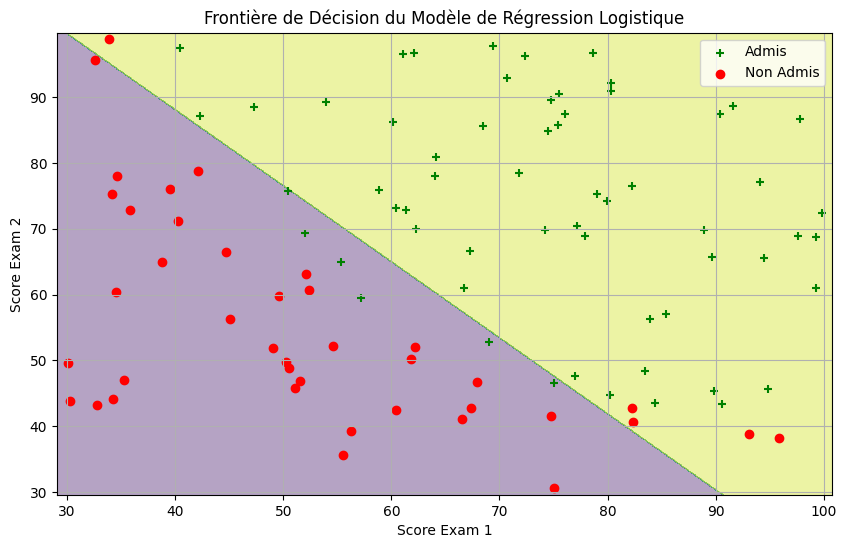

In [6]:
# Créer une grille pour tracer la frontière de décision
x_min, x_max = X['Exam 1'].min() - 1, X['Exam 1'].max() + 1
y_min, y_max = X['Exam 2'].min() - 1, X['Exam 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Faire des prédictions pour chaque point de la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(admitted['Exam 1'], admitted['Exam 2'], c='green', label='Admis', marker='+')
plt.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'], c='red', label='Non Admis', marker='o')

plt.xlabel('Score Exam 1')
plt.ylabel('Score Exam 2')
plt.title('Frontière de Décision du Modèle de Régression Logistique')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Exemple de prédiction pour un nouvel étudiant
nouveau_score = np.array([[45, 85]])  # Scores pour Exam 1 et Exam 2
prediction = model.predict(nouveau_score)
probabilite = model.predict_proba(nouveau_score)

print(f"\nPrédiction pour un nouvel étudiant avec les scores {nouveau_score[0]} :")
print(f"Admis : {'Oui' if prediction[0] == 1 else 'Non'}")
print(f"Probabilité d'admission : {probabilite[0][1]*100:.2f}%")



Prédiction pour un nouvel étudiant avec les scores [45 85] :
Admis : Oui
Probabilité d'admission : 64.46%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
